<img src = "Images/py_for_da_book.jpg">



Notes, text, exercises, etc from reading <b> Python for Data Analysis</b> by <b><i>Wes McKinney</i></b>

# Ch.4 NumPy Basics: Arrays and Vectorized Computation

In [1]:
# Can see reason for NumPy when comparing performance differences
# NumPy array of one million integers and equivalent Python list

import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))



In [2]:
# multiply each sequence by two

%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 17 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 666 ms


## 4.1 The NumPy ndarray: A multidimensional Array Object

In [4]:
# use the array function to create an array
# accepts any sequence-like object

data1 = [6,7.5,8,0,1]

arr1 = np.array(data1)

In [5]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [6]:
# nested sequences like a list of equal-length lists will be converted into a multidimensional array

data2= [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
print('arr2 is', arr2.ndim , 'dimensions')
print('Shape of arr2:', arr2.shape)

arr2 is 2 dimensions
Shape of arr2: (2, 4)


In [12]:
# unless explicitly specified np.array tries to infer a good data type for the array it creates

arr2.dtype

dtype('int32')

In [13]:
arr1.dtype

dtype('float64')

In [14]:
# other functions to create an array
# zeros and ones create an array of 0s or 1s
# with a given length or shape

np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [19]:
# exmpty creates an array without initializing its values to any particular value

np.empty((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

<b>table of array creation functions for NumPy</b>
<br>
<img src = 'Images/pda_array_func.png'>

### Data Types for ndarrays

In [21]:
arr1 = np.array([1,2,3], dtype = np.float64)

arr1.dtype

dtype('float64')

In [22]:
# convert or cast an array from one dtype to another using astype method

arr = np.array([1,2,3,4,5])

arr.dtype

dtype('int32')

In [26]:
# cast integers from arr to floating-point numbers
float_arr = arr.astype(np.float64)

float_arr

array([1., 2., 3., 4., 5.])

In [24]:
float_arr.dtype

dtype('float64')

In [27]:
# if you do the reverse: floating-point numbers to integer dtype the decimal part will be truncated

arr = np.array([3.2,-7.4,7.8,-9.0,0.87])
arr.dtype

dtype('float64')

In [28]:
arr

array([ 3.2 , -7.4 ,  7.8 , -9.  ,  0.87])

In [31]:
# cast to int removes decimal part
arr.astype(np.int)

array([ 3, -7,  7, -9,  0])

In [35]:
# array of strings representing numbers

num_strings = np.array(['1.43', '9.87', '-3.01'], dtype = np.string_)


In [36]:
# can use astype to convert to numeric form

num_strings.astype(float)

array([ 1.43,  9.87, -3.01])

<i><font color = yellow>NOTE: be cautious when using numpy.string_ type bc string data in NumPy is a fixed size so it can truncate the input data. <b>pandas</b> has better ability to handle non-numeric data</font></i>

### Arithmetic with NumPy Arrays
<br>
"Arrays are important because they enable you to express batch operations on data without writing any <font color = yellow>for</font> loops. NumPy users call this <i>vectorization</i>. Any arithemtic operations between equal-size arrays applies the operation element-wise: "

In [37]:
arr = np.array([[1.,2.,3.], [4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [38]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [39]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
# scalar argument to each element in array

1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [42]:
arr2 = np.array([[0.,4.,1.], [7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [43]:
# comparisons between arrays of the same size yield boolean arrays

arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [44]:
arr2 < arr

array([[ True, False,  True],
       [False,  True, False]])

### Basic Indexing and Slicing

In [45]:
# one dimensional arrays act similarly to Python lists

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
arr[5]

5

In [47]:
arr[5:8]

array([5, 6, 7])

In [49]:
# assigning a scalar value to a slice will propagated or broadcast to entire selection

arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [50]:
# unlike lists array slices are views of the original array
# data is not copied so modifying sliced data is reflected in the source array

# create slice of arr
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [51]:
# change value in arr_slice and it is reflected in arr
arr_slice[1] = 12345
# will change original array
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

NumPy was designed to work with very large arrays and datasets. If it constantly copied data there would be performance and memory problems

In [52]:
# can copy a slice of ndarray need to explicitly copy
arr_copy = arr[5:8].copy()
arr_copy

array([   12, 12345,    12])

In [53]:
# use bare slice to change all values
arr_copy[:] = 0
arr_copy

array([0, 0, 0])

In [54]:
# check original didn't change
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [56]:
# for two-dimensional arrays each index is a one-dimensional instead of a scalar
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [57]:
# index returns a nested array
arr2d[2]

array([7, 8, 9])

In [58]:
# to select individual elements
# recursively select - that is index nested array then index value in nested array
arr2d[0][2]

3

In [59]:
# or equivalent way with comma-separated list
arr2d[0,2]

3

Indexing with comma same as how you reference elements in a matrix for linear algebra or in math - (row, column)
<br>
<img src = 'Images/pda_index_nparray.png'>
<br>
<font color = yellow><b>axis 0 = rows <br>axis 1 = columns</b></font>

### Indexing with Slices

In [60]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
# slice along axis 0
# select the first two rows 
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
# can pass multiple slices
# like above slice - get first two rows
# then from two rows return elements from index 1 and up
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

## 4.2 Universal Functions: Fast Element-Wise Array Functions

In [63]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
# ufunc perform element-wise operations on data in ndarrays
# simple transformations like sqrt
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [65]:
# or exp
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [66]:
x = np.random.randn(8)
x

array([ 0.17229129, -0.23354679, -0.85859759, -0.1099222 ,  0.04943441,
       -0.30939765, -0.09404146, -0.55682987])

In [67]:
y = np.random.randn(8)
y

array([-0.00782045,  0.17233572, -0.90707262, -0.57416782,  1.37017674,
       -0.112708  ,  1.82200195, -0.88560646])

In [68]:
# others take two arrays and return a single array
# compute element-wise maximum for elements in both x and y
np.maximum(x, y)

array([ 0.17229129,  0.17233572, -0.85859759, -0.1099222 ,  1.37017674,
       -0.112708  ,  1.82200195, -0.55682987])

In [69]:
arr = np.random.randn(7)*5
arr

array([ 2.460904  ,  1.63543956,  7.4810056 , -1.19299135, 14.12488259,
       -0.06436706,  3.89065247])

In [70]:
# some return multiple arrays
# returns the fractional and integrals parts of a floating-point array
remainder, whole_part = np.modf(arr)

In [71]:
remainder

array([ 0.460904  ,  0.63543956,  0.4810056 , -0.19299135,  0.12488259,
       -0.06436706,  0.89065247])

In [72]:
whole_part

array([ 2.,  1.,  7., -1., 14., -0.,  3.])

<i>Unary ufuncs</i> are the simple element-wise transformations
<br>
<img src = 'Images/pda_unary.png'>

<i>Binary universal functions</i> take two arrays and return a single array as the result
<br>
<img src = 'Images/pda_binary_ufunc.png'>

## 4.3 Array-Oriented Programming with Arrays

"Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as <i>vectorization</i>. In general, vectorized array operations will often be one or two (or more) orders of magnitude fasters than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later in <b><font color = red>Appendix A</font></b>, I explain <i>broadcasting</i>, a powerful method for vectorizing computations."

In [73]:
# evaluate function sqrt(x^2 + y^2) across a regular grid of values
# np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x,y) in the two arrays

# 1000 equally spaced points
points = np.arange(-5,5,0.01)

In [74]:
xs, ys = np.meshgrid(points, points)

In [75]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [76]:
# can evaluate function the same you would with two points
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

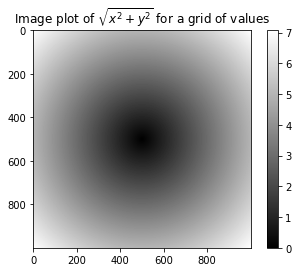

In [81]:
# preview of Chapter 9 using matplotlib to create visualizations of this two-dimensional array
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing Conditional Logic as Array Operations

In [82]:
# np.where function is a vectorized version of the ternary expression x if condition else y
# np.where(condition[,x,y])
# return elements chosen from x or y depending on condition

# condition: array_like, bool
# where True, yield x, otherwise yield y
cond = np.array([True, False, True, True, False])

# array_like
# need to be broadcastable to some shape
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])

In [83]:
#  list comprehension of comparing elements in arrays based on the cond
result = [(x if c else y)
         for x,y,c in zip(xarr,yarr,cond)]

In [84]:
# multiple problems
# not be fast on large arrays
# not work in multidimensional arrays
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [85]:
# using the .where function
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [86]:
# the 2nd and 3rd arguments dont need to be arrays
# one or both can be scalars
# typical use in DA is to produce a new array of values based on another array

# matrix of randomly generated data
arr = np.random.randn(4,4)
arr

array([[ 0.25867297, -1.16274906,  0.13960505,  1.43152505],
       [-0.90285788,  1.86346762, -0.54981373,  2.26895711],
       [-0.3086873 , -0.14314314,  0.41319537,  0.1663501 ],
       [-2.55001157, -0.96488839, -0.23541435, -0.34041877]])

In [87]:
# want to set values based on positive or negative
arr > 0

array([[ True, False,  True,  True],
       [False,  True, False,  True],
       [False, False,  True,  True],
       [False, False, False, False]])

In [88]:
# use above bool array as cond
# and the args as scalars
# all positive values become 2 and negative become -2
np.where(arr > 0, 2,-2)

array([[ 2, -2,  2,  2],
       [-2,  2, -2,  2],
       [-2, -2,  2,  2],
       [-2, -2, -2, -2]])

In [89]:
# can combine scalars and arrays
# replace only positive values with 2 and leave negative values
np.where(arr >0, 2, arr)

array([[ 2.        , -1.16274906,  2.        ,  2.        ],
       [-0.90285788,  2.        , -0.54981373,  2.        ],
       [-0.3086873 , -0.14314314,  2.        ,  2.        ],
       [-2.55001157, -0.96488839, -0.23541435, -0.34041877]])

### Mathematical and Statistical Methods

In [90]:
# create some normally distributed random data
arr = np.random.randn(5,4)
arr

array([[-0.12690257,  0.20947898, -0.13568203, -1.04608492],
       [-1.99414095, -1.27172859, -0.17357401, -0.06510558],
       [-0.49454302, -0.57313318,  1.09037911,  0.82265854],
       [ 0.53696272,  0.3230644 , -2.389161  , -3.33651151],
       [ 0.83552922, -0.5948824 , -1.41901514, -1.58267809]])

In [91]:
# compute some aggregate statistics
arr.mean()

-0.5692535014290647

In [92]:
np.mean(arr)

-0.5692535014290647

In [93]:
arr.sum()

-11.385070028581294

In [94]:
# functions can take optional axis arguments and compute over given axis
arr.mean(axis=1)

array([-0.27479764, -0.87613728,  0.21134036, -1.21641135, -0.6902616 ])

In [95]:
arr.sum(axis=0)

array([-1.24309459, -1.9072008 , -3.02705308, -5.20772156])

In [96]:
# cumsum do not aggregate
# result is an array of intermediate results
arr = np.array([0,1,2,3,4,5,6,7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [98]:
arr = np.array([1,2,3,4,5,6,7])
arr.cumprod()

array([   1,    2,    6,   24,  120,  720, 5040], dtype=int32)

In multidiemnsional arrays, accumulation functions like <b>cumsum</b> return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [1]:
# multidimensional array
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])

arr.shape

(3, 3)

In [2]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [4]:
arr.cumsum(axis =0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [5]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays

In [6]:
arr = np.random.randn(100)

In [7]:
# sum can be used to count True values in a boolean array
(arr >0).sum()

51

In [8]:
# any method tests whether one or more values in an array is True
bools = np.array([False, True,False, False])

bools.any()

True

In [9]:
# all method checks if every value is True
bools.all()

False

### Sorting

In [10]:
# NumPy arrays can be sorted in-place
# like Python's built-in list type
arr = np.random.randn(6)
arr

array([ 0.88190148,  0.26864022, -0.23011862, -0.23289808, -0.30622547,
        0.10959278])

In [11]:
arr.sort()

In [12]:
arr

array([-0.30622547, -0.23289808, -0.23011862,  0.10959278,  0.26864022,
        0.88190148])

In [13]:
# works foor multidimensional array
arr = np.random.randn(5,3)
arr

array([[ 0.14647711,  0.20944332,  0.19165253],
       [ 0.94978826, -0.47231125,  0.40468309],
       [-0.20660694,  0.92309654,  0.45885166],
       [ 0.08187511, -0.39122573,  1.13917797],
       [ 0.31471833, -0.06623301, -0.77096294]])

In [14]:
# can sort in place along an axis by passing the axis number to sort
arr.sort(1)
arr

array([[ 0.14647711,  0.19165253,  0.20944332],
       [-0.47231125,  0.40468309,  0.94978826],
       [-0.20660694,  0.45885166,  0.92309654],
       [-0.39122573,  0.08187511,  1.13917797],
       [-0.77096294, -0.06623301,  0.31471833]])

In [15]:
# quick and dirty way to compute quantiles of an array
# sort it and select the values at a particular rank
large_arr = np.random.randn(1000)

In [16]:
large_arr.sort()

In [17]:
# 5% quantile
large_arr[int(0.05*len(large_arr))]

-1.6777634342003604

### Unique and Other Set Logic

In [19]:
# return sorted unique values for 1D array
names = np.array(['Bob', 'Karen', 'Steve', 'Joe','Bob', 'Steve'])
names

array(['Bob', 'Karen', 'Steve', 'Joe', 'Bob', 'Steve'], dtype='<U5')

In [20]:
np.unique(names)

array(['Bob', 'Joe', 'Karen', 'Steve'], dtype='<U5')

In [21]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [22]:
np.unique(ints)

array([1, 2, 3, 4])

In [23]:
# function np.in1d tests membership of the values in one array in another
# returning a boolean array
values = ([6,0,0,3,2,5,6])

In [24]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

<img src = 'Images/pda_set_funcs.png'>

## 4.4 File Input and Output with Arrays

<i>np.save</i> and <i>np.load</i> are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension <i>.npy</i>:

In [25]:
arr = np.arange(10)

In [26]:
np.save('some_array', arr)

In [27]:
# now load saved array
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
# save multiple arrays in an uncompressed archive using np.savez
# passing the arrays as keyword args
np.savez('array_archive.npz', a=arr, b=arr)

In [29]:
# when loading an .npz file get back a dict-like objects
# loads the individual arrays lazily
arch = np.load('array_archive.npz')

In [30]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# if data compresses well use numpy.savez_compressed
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5 Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library. Multiplying two 2D arrays with * is an element-wise product instead of a matrix dot product. There is a function <i>dot</i>, both an array method and a function in the numpy namespace for matrix multiplication:

In [32]:
x = np.array([[1.,2.,3.], [4.,5.,6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [35]:
x.shape

(2, 3)

In [33]:
y = np.array([[6.,23.], [-1,7], [8,9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [36]:
y.shape

(3, 2)

In [37]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [38]:
# x.dot(y) is equivalent to np.dot(x,y):
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [39]:
# matrix product between a 2D array and a suitably sized 1D array results in a 1D array
np.dot(x, np.ones(3))

array([ 6., 15.])

In [40]:
# the @ symbol works as an infix operator
# performs matrix multiplication
x @ np.ones(3)

array([ 6., 15.])

<i>numpy.linalg</i> has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry-standard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK....

In [41]:
# import library
from numpy.linalg import inv,qr

In [42]:
X = np.random.randn(5,5)

In [48]:
# dot product of X with its transpose X.T
mat = X.T.dot(X)

In [49]:
inv(mat)

array([[ 0.39681149,  0.39515183,  0.28462928,  0.0139934 , -0.49965954],
       [ 0.39515183,  0.78386959,  0.38925141, -0.08254805, -0.19591129],
       [ 0.28462928,  0.38925141,  0.41752841, -0.09201596,  0.08713863],
       [ 0.0139934 , -0.08254805, -0.09201596,  0.18433389, -0.58421025],
       [-0.49965954, -0.19591129,  0.08713863, -0.58421025,  3.67916145]])

In [50]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -2.22632920e-16,  2.06092493e-17,
        -1.12847890e-17, -7.83217070e-17],
       [-4.21936666e-17,  1.00000000e+00, -1.66029499e-16,
         4.35851718e-17, -1.08592827e-16],
       [ 5.72039265e-16,  7.17299404e-16,  1.00000000e+00,
         5.08500814e-18, -6.89302569e-17],
       [ 1.04838062e-16,  3.02711782e-16,  5.20053723e-17,
         1.00000000e+00,  9.53011687e-16],
       [-4.29014255e-17,  1.37139009e-17,  2.89091836e-17,
         1.73010476e-17,  1.00000000e+00]])

In [51]:
q, r = qr(mat)

In [52]:
r

array([[-11.69919289,   1.99330479,   7.57207462,   0.2625052 ,
         -1.65302936],
       [  0.        ,  -3.69656136,   3.77534278,  -5.51078846,
         -1.18647679],
       [  0.        ,   0.        ,  -3.53537362, -11.58667446,
         -1.79628431],
       [  0.        ,   0.        ,   0.        ,  -5.61809607,
         -0.89422797],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.26562355]])

## 4.6 Pseudorandom Number Generation

In [53]:
# get 4 x 4 array of samples from the standard normal dist using normal
samples = np.random.normal(size=(4,4))
samples

array([[ 1.44511607, -0.12116484,  1.19124984, -1.28211716],
       [-0.09118691,  0.86501612, -2.78552825, -1.56582352],
       [ 0.02235769, -0.89860773, -0.32656923,  0.91996321],
       [-0.05375668, -0.15700311, -0.29079913,  0.61422974]])

In [54]:
# can change NumPy's random number generation seed
np.random.seed(1234)

In [55]:
# data generation functions in numpy.random use a global random seed
# avoid global state 
# create random number generator isolated from others

rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 Example: Random Walks

The simulation of [random walks](https://en.wikipedia.org/wiki/Random_walk) provides an illustrative application of utilizing array operations. Let's first consider a simple random walk starting at 0 with steps of 1 and -1 occurding with equal probability

In [56]:
# pure python way to implement a single random walk with 1000 steps using built in random module

import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position+= step
    walk.append(position)

In [57]:
# using np.random
nsteps = 1000

In [58]:
draws = np.random.randint(0,2, size = nsteps)

In [59]:
steps = np.where(draws>0, 1, -1)

In [60]:
walk = steps.cumsum()

In [61]:
# extract statistics of walk trajectory
walk.min()

-9

In [62]:
walk.max()

60

A more complicated statistic is the <i>first crossing time</i>, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direct. np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the <i>first</i> 10 or -10. Turns out, we can compute this using <b>argmax</b>, which returns the first index of the maximum value in the boolean array (True is the maximum value):

In [63]:
(np.abs(walk) >= 10).argmax()

297

### Simulating Many Random Walks at Once

In [64]:
# simulate 5,000 random walks
nwalks = 5000

In [65]:
nsteps = 1000

In [66]:
# generate 2D array of draws by passing a 2-tuple
# 0 or 1
draws = np.random.randint(0,2, size = (nwalks, nsteps))

In [67]:
steps = np.where(draws > 0, 1, -1)

In [68]:
# use cumsum to compute all 5000 random walks in one shot
walks = steps.cumsum(1)

In [69]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [70]:
walks.max()

122

In [71]:
walks.min()

-128

In [72]:
# compute minimum crossing time to 30 or -30
hits30 = (np.abs(walks) >= 30).any(1)

In [73]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [74]:
# number that hit 30 or -30
hits30.sum()

3368

In [75]:
# use above boolean array to slect rows of walks that actually cross abs 30 level
crossing_times = (np.abs(walks[hits30]) >=30).argmax(1)

In [76]:
crossing_times

array([133, 395, 343, ..., 409, 297, 747], dtype=int64)

In [77]:
# get avg time
crossing_times.mean()

509.99762470308787

# Ch.5 Getting Started with Pandas

In [78]:
import pandas as pd

In [80]:
from pandas import Series, DataFrame

### Series

In [81]:
obj = pd.Series([4,7,-5,3])

In [82]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [83]:
# array representation
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [84]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [85]:
# identify index with label for data points
obj2 = pd.Series([4,7,-5,3], index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [86]:
obj2['a']

-5

In [87]:
obj2['d'] = 6

In [88]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [89]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

In [90]:
obj2*2

d    12
b    14
a   -10
c     6
dtype: int64

In [91]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [92]:
# can use like dict
'b' in obj2

True

In [93]:
# python dict
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [95]:
# use dict to create series
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [96]:
# keys of dict automatically become index in Series
states = ['California','Ohio','Oregon','Texas']


In [97]:
# can overide index values of dict/keys
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [98]:
# detect missing data
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [99]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [100]:
# instance methods
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [101]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [102]:
# name attribute for Series
obj4.name = 'population'

In [103]:
obj4.index.name = 'state'

In [104]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [105]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [106]:
# index can be altered in place by assignment
obj.index = ['Bob','Steve','Jeff','Ryan']

In [107]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame 

In [109]:
# construct with a dict of equal-length lists or NumPy arrays
data = {'state': ['Ohio','Ohio','Ohio', 'Nevada','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [110]:
# specify columns to arrange in that order
pd.DataFrame(data, columns=['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [112]:
# if you pass in column not in dict it will appear with missing values
frame2 = pd.DataFrame(data, columns=['year','state','pop', 'debt'], index=['one','two','three','four','five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [113]:
# can retrieve colum in DF by dict-like notation 
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [114]:
# or by attribute
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [115]:
# can retrieve rows by position or name with special loc attribute
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [116]:
# modify columns by assignment
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [118]:
# or assign an array
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [120]:
# can assign with series
# must be same length or nan
val = pd.Series([-1.2,-1.5,-1.7], index = ['two','four','five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [125]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [126]:
# remove column
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [127]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')